Pharmacy Diversification Analysis:
  Pharmacy     HHI  Shannon Entropy  Product Count  Diversification Score  \
0    PHY A  0.3000         1.279854              4               1.000000   
1    PHY D  0.3267         1.097576              3               0.904643   
2    PHY B  0.5200         0.673012              2               0.214286   
3    PHY C  0.5800         0.610864              2               0.000000   

   Diversification Rank  
0                     1  
1                     2  
2                     3  
3                     4  


<ipython-input-1-4a9a35b07105>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pharmacy', y='Diversification Score', data=df_sorted, palette='viridis')


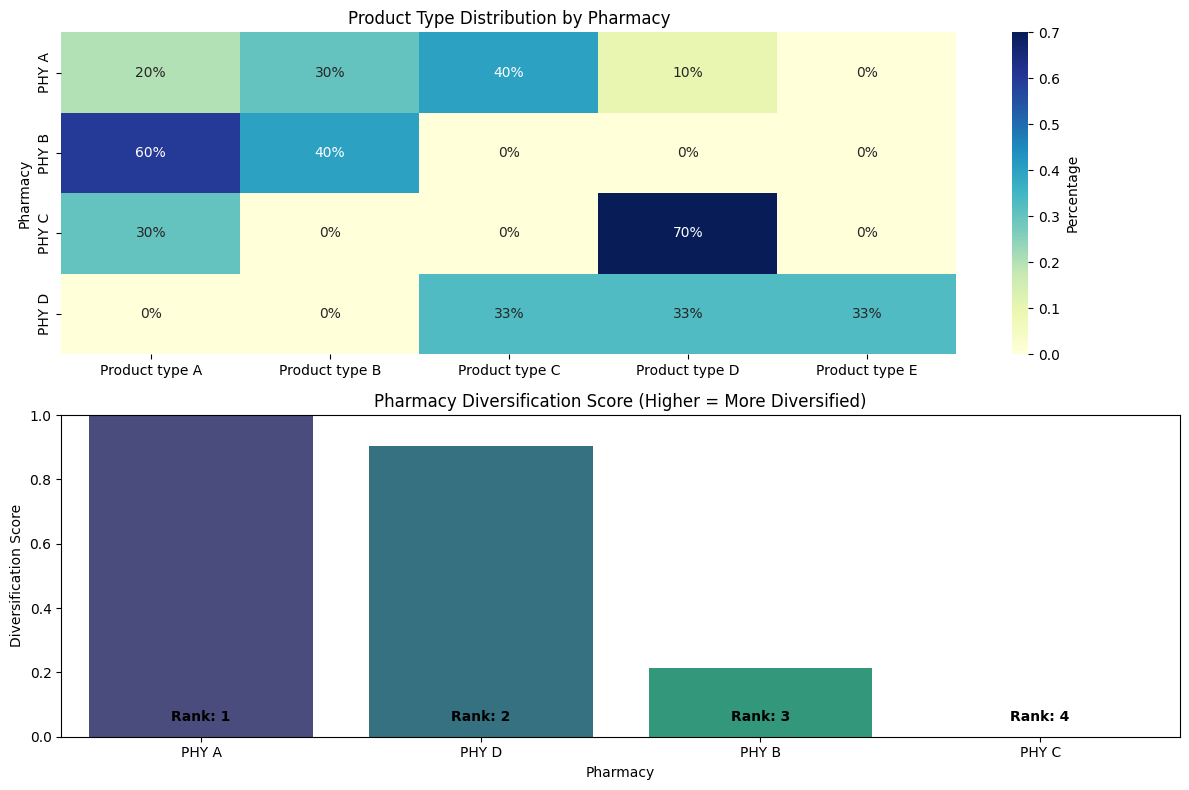


Detailed Analysis:

PHY A (Rank 1):
  - HHI: 0.3000 (lower is better)
  - Shannon Entropy: 1.2799 (higher is better)
  - Number of product types: 4
  - Diversification Score: 1.0000
  - Product distribution: Product type A: 20%, Product type B: 30%, Product type C: 40%, Product type D: 10%

PHY D (Rank 2):
  - HHI: 0.3267 (lower is better)
  - Shannon Entropy: 1.0976 (higher is better)
  - Number of product types: 3
  - Diversification Score: 0.9046
  - Product distribution: Product type C: 33%, Product type D: 33%, Product type E: 33%

PHY B (Rank 3):
  - HHI: 0.5200 (lower is better)
  - Shannon Entropy: 0.6730 (higher is better)
  - Number of product types: 2
  - Diversification Score: 0.2143
  - Product distribution: Product type A: 60%, Product type B: 40%

PHY C (Rank 4):
  - HHI: 0.5800 (lower is better)
  - Shannon Entropy: 0.6109 (higher is better)
  - Number of product types: 2
  - Diversification Score: 0.0000
  - Product distribution: Product type A: 30%, Product type D: 7

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create the dataframe from the CSV data
data = {
    'Month': ['Jan', 'Jan', 'Jan', 'Jan'],
    'Pharmacy': ['PHY A', 'PHY B', 'PHY C', 'PHY D'],
    'Product type A': [0.20, 0.60, 0.30, 0.00],
    'Product type B': [0.30, 0.40, 0.00, 0.00],
    'Product type C': [0.40, 0.00, 0.00, 0.33],
    'Product type D': [0.10, 0.00, 0.70, 0.33],
    'Product type E': [0.00, 0.00, 0.00, 0.33]
}

df = pd.DataFrame(data)

# Function to calculate Herfindahl-Hirschman Index (HHI)
def calculate_hhi(row):
    # Filter only the product type columns
    product_values = row[['Product type A', 'Product type B', 'Product type C', 'Product type D', 'Product type E']]
    # Calculate HHI (sum of squared percentages)
    hhi = sum(x**2 for x in product_values)
    return hhi

# Function to calculate Shannon Entropy (higher = more diversified)
def calculate_shannon_entropy(row):
    # Filter only the product type columns
    product_values = row[['Product type A', 'Product type B', 'Product type C', 'Product type D', 'Product type E']]
    # Calculate Shannon entropy, ignoring zeros
    entropy = 0
    for value in product_values:
        if value > 0:
            entropy -= value * np.log(value)
    return entropy

# Function to count non-zero product types
def count_product_types(row):
    product_values = row[['Product type A', 'Product type B', 'Product type C', 'Product type D', 'Product type E']]
    return sum(1 for x in product_values if x > 0)

# Calculate metrics
df['HHI'] = df.apply(calculate_hhi, axis=1)
df['Shannon Entropy'] = df.apply(calculate_shannon_entropy, axis=1)
df['Product Count'] = df.apply(count_product_types, axis=1)

# Create diversification score (normalized inverse of HHI)
df['Diversification Score'] = 1 - (df['HHI'] - df['HHI'].min()) / (df['HHI'].max() - df['HHI'].min())

# Rank pharmacies by diversification (higher score = better diversification)
df_ranked = df.sort_values('Diversification Score', ascending=False).reset_index(drop=True)
df_ranked['Diversification Rank'] = df_ranked.index + 1

print("Pharmacy Diversification Analysis:")
print("=================================")
print(df_ranked[['Pharmacy', 'HHI', 'Shannon Entropy', 'Product Count', 'Diversification Score', 'Diversification Rank']])

# Create visualizations
plt.figure(figsize=(12, 8))

# 1. Heatmap of product distribution
plt.subplot(2, 1, 1)
product_columns = ['Product type A', 'Product type B', 'Product type C', 'Product type D', 'Product type E']
heatmap_data = df.set_index('Pharmacy')[product_columns]
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0%', cbar_kws={'label': 'Percentage'})
plt.title('Product Type Distribution by Pharmacy')

# 2. Bar chart for diversification metrics
plt.subplot(2, 1, 2)
# Sort by diversification score for the bar chart
df_sorted = df.sort_values('Diversification Score', ascending=False)
sns.barplot(x='Pharmacy', y='Diversification Score', data=df_sorted, palette='viridis')
plt.title('Pharmacy Diversification Score (Higher = More Diversified)')
plt.ylim(0, 1)

# Add rank labels
for i, row in enumerate(df_sorted.itertuples()):
    plt.text(i, 0.05, f"Rank: {i + 1}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Display detailed analysis
print("\nDetailed Analysis:")
print("=================")
for i, row in df_ranked.iterrows():
    print(f"\n{row['Pharmacy']} (Rank {i+1}):")
    print(f"  - HHI: {row['HHI']:.4f} (lower is better)")
    print(f"  - Shannon Entropy: {row['Shannon Entropy']:.4f} (higher is better)")
    print(f"  - Number of product types: {row['Product Count']}")
    print(f"  - Diversification Score: {row['Diversification Score']:.4f}")

    # Product distribution
    product_dist = []
    for col in product_columns:
        if row[col] > 0:
            product_dist.append(f"{col}: {row[col]:.0%}")
    print(f"  - Product distribution: {', '.join(product_dist)}")

Alternative Pharmacy Diversification Analysis:
  Pharmacy  Gini-Simpson Index  Evenness Score  Composite Score  \
0    PHY D              0.6733        1.000000         0.760000   
1    PHY A              0.7000        0.659458         0.849288   
2    PHY B              0.4800        0.779519         0.628380   
3    PHY C              0.4200        0.638698         0.592516   

   Diversification Score  Diversification Rank  
0               0.811100                     1  
1               0.736248                     2  
2               0.629300                     3  
3               0.550405                     4  

Detailed Pharmacy Analysis:

PHY D (Rank 1):
  • Products carried: 3 out of 5 types
  • Product mix: C: 33%, D: 33%, E: 33%
  • Gini-Simpson Index: 0.6733 - Measures diversity
  • Evenness Score: 1.0000 - Measures distribution balance
  • Composite Score: 0.7600 - Combines breadth and balance
  • Final Diversification Score: 0.8111
  • ANALYSIS: Highest diversification

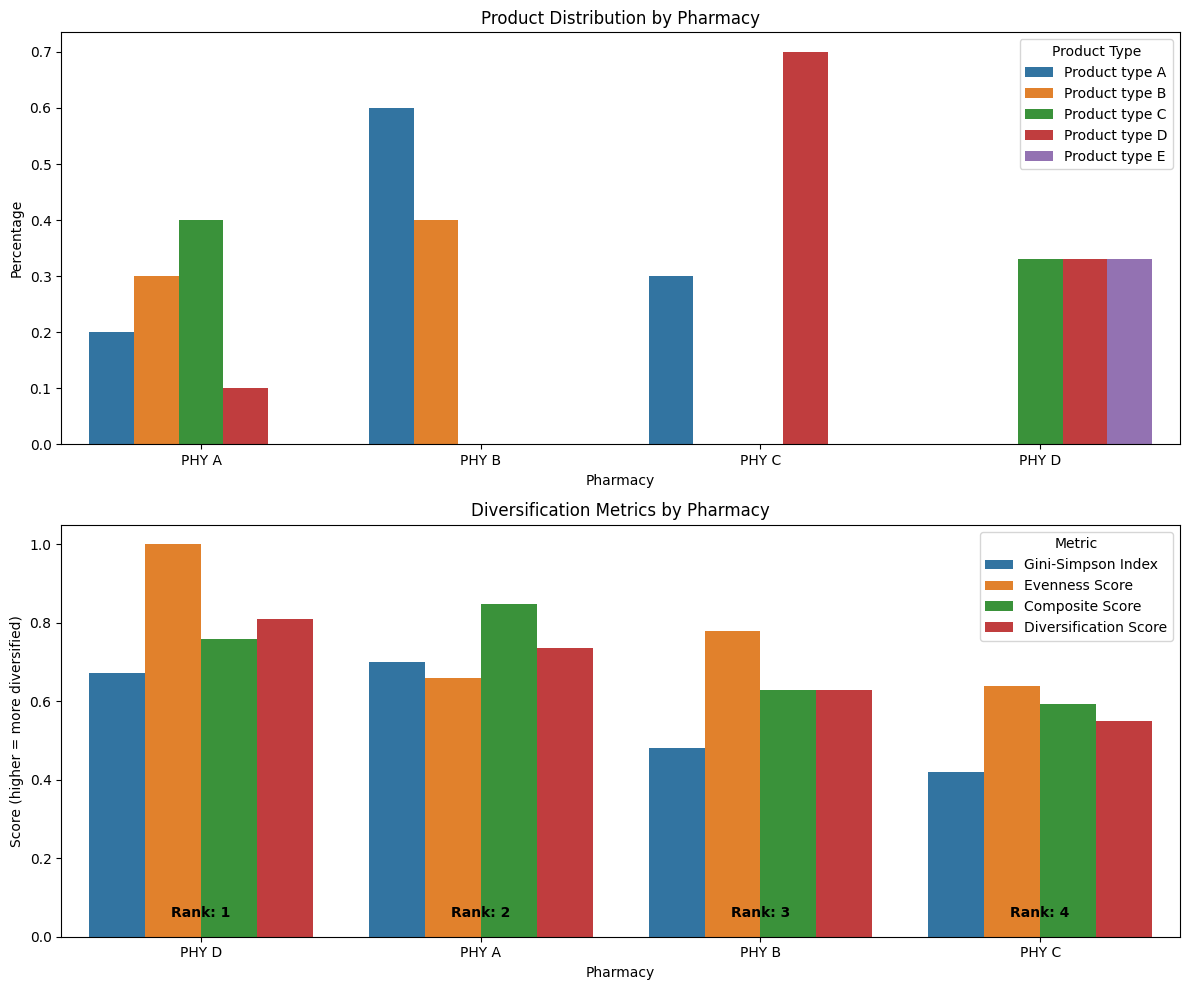

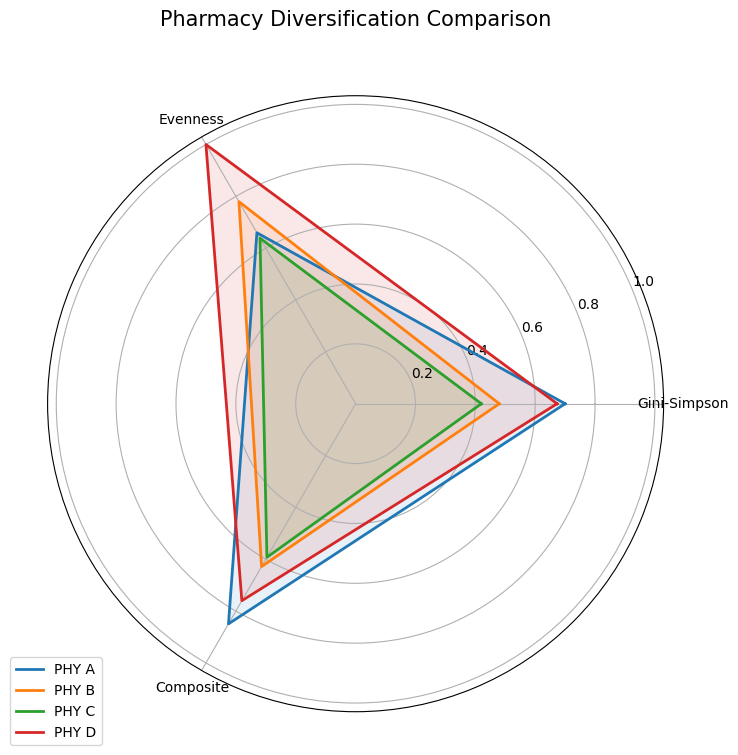

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
import seaborn as sns

# Create the dataframe from the CSV data
data = {
    'Month': ['Jan', 'Jan', 'Jan', 'Jan'],
    'Pharmacy': ['PHY A', 'PHY B', 'PHY C', 'PHY D'],
    'Product type A': [0.20, 0.60, 0.30, 0.00],
    'Product type B': [0.30, 0.40, 0.00, 0.00],
    'Product type C': [0.40, 0.00, 0.00, 0.33],
    'Product type D': [0.10, 0.00, 0.70, 0.33],
    'Product type E': [0.00, 0.00, 0.00, 0.33]
}

df = pd.DataFrame(data)
product_cols = ['Product type A', 'Product type B', 'Product type C', 'Product type D', 'Product type E']

# METHOD 1: Gini-Simpson Index (1 - Simpson's Index)
# Higher value means more diversity
def gini_simpson(row):
    values = [row[col] for col in product_cols]
    return 1 - sum(x**2 for x in values if x > 0)

# METHOD 2: Coefficient of Variation (inverted)
# Lower CV means more even distribution
def coefficient_variation(row):
    values = [row[col] for col in product_cols if row[col] > 0]
    if not values:
        return 0
    mean = np.mean(values)
    std = np.std(values, ddof=1)
    cv = std / mean if mean > 0 else float('inf')
    # Invert and normalize to 0-1 range (1 = perfectly even)
    return 1 / (1 + cv)

# METHOD 3: Composite score based on:
# 1. Number of product types (breadth)
# 2. Evenness of distribution (balance)
def composite_score(row):
    values = [row[col] for col in product_cols]
    # Count non-zero products (breadth)
    product_count = sum(1 for x in values if x > 0)
    breadth_score = product_count / len(product_cols)

    # Calculate evenness using normalized entropy (balance)
    non_zero = [x for x in values if x > 0]
    if not non_zero:
        balance_score = 0
    else:
        max_entropy = np.log(len(non_zero))
        actual_entropy = entropy(non_zero, base=np.e)
        balance_score = actual_entropy / max_entropy if max_entropy > 0 else 0

    # Weighted composite (60% breadth, 40% balance)
    return 0.6 * breadth_score + 0.4 * balance_score

# Calculate all metrics
df['Gini-Simpson Index'] = df.apply(gini_simpson, axis=1)
df['Evenness Score'] = df.apply(coefficient_variation, axis=1)
df['Composite Score'] = df.apply(composite_score, axis=1)

# Calculate the final diversification score (average of all metrics)
df['Diversification Score'] = df[['Gini-Simpson Index', 'Evenness Score', 'Composite Score']].mean(axis=1)

# Rank pharmacies
df_ranked = df.sort_values('Diversification Score', ascending=False).reset_index(drop=True)
df_ranked['Diversification Rank'] = df_ranked.index + 1

# Create a radar chart for visualizing multiple dimensions of diversification
def create_radar_chart(df):
    # Prepare the data
    categories = ['Gini-Simpson', 'Evenness', 'Composite']
    N = len(categories)

    # Create the angle for each category
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop

    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Add each pharmacy
    for i, pharmacy in enumerate(df['Pharmacy']):
        values = [
            df.loc[df['Pharmacy'] == pharmacy, 'Gini-Simpson Index'].values[0],
            df.loc[df['Pharmacy'] == pharmacy, 'Evenness Score'].values[0],
            df.loc[df['Pharmacy'] == pharmacy, 'Composite Score'].values[0]
        ]
        values += values[:1]  # Close the loop

        # Plot the pharmacy
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=pharmacy)
        ax.fill(angles, values, alpha=0.1)

    # Set category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Add legend and title
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Pharmacy Diversification Comparison', size=15, y=1.1)

    return fig

# Create the visualizations
plt.figure(figsize=(12, 10))

# 1. Stacked bar chart
plt.subplot(2, 1, 1)
df_melted = pd.melt(df, id_vars=['Pharmacy'], value_vars=product_cols,
                    var_name='Product Type', value_name='Percentage')
sns.barplot(x='Pharmacy', y='Percentage', hue='Product Type', data=df_melted)
plt.title('Product Distribution by Pharmacy')
plt.ylabel('Percentage')
plt.legend(title='Product Type')

# 2. Diversification score comparison
plt.subplot(2, 1, 2)
metrics = ['Gini-Simpson Index', 'Evenness Score', 'Composite Score', 'Diversification Score']
df_metrics = pd.melt(df_ranked, id_vars=['Pharmacy', 'Diversification Rank'],
                     value_vars=metrics, var_name='Metric', value_name='Score')

sns.barplot(x='Pharmacy', y='Score', hue='Metric', data=df_metrics)
plt.title('Diversification Metrics by Pharmacy')
plt.ylabel('Score (higher = more diversified)')

# Add rank annotations
for i, rank in enumerate(df_ranked['Diversification Rank']):
    plt.text(i, 0.05, f"Rank: {rank}", ha='center', fontweight='bold')

plt.tight_layout()

# Create and show the radar chart in a separate figure
radar_fig = create_radar_chart(df)

print("Alternative Pharmacy Diversification Analysis:")
print("===========================================")
print(df_ranked[['Pharmacy', 'Gini-Simpson Index', 'Evenness Score', 'Composite Score',
                'Diversification Score', 'Diversification Rank']])

# Detailed analysis of each pharmacy
print("\nDetailed Pharmacy Analysis:")
print("=========================")
for _, row in df_ranked.iterrows():
    pharmacy = row['Pharmacy']
    print(f"\n{pharmacy} (Rank {int(row['Diversification Rank'])}):")

    # Get product distribution
    products = [f"{col.split(' ')[-1]}: {row[col]:.0%}" for col in product_cols if row[col] > 0]
    product_count = sum(1 for col in product_cols if row[col] > 0)

    print(f"  • Products carried: {product_count} out of {len(product_cols)} types")
    print(f"  • Product mix: {', '.join(products)}")
    print(f"  • Gini-Simpson Index: {row['Gini-Simpson Index']:.4f} - Measures diversity")
    print(f"  • Evenness Score: {row['Evenness Score']:.4f} - Measures distribution balance")
    print(f"  • Composite Score: {row['Composite Score']:.4f} - Combines breadth and balance")
    print(f"  • Final Diversification Score: {row['Diversification Score']:.4f}")

    # Analysis explanation
    if row['Diversification Rank'] == 1:
        print("  • ANALYSIS: Highest diversification with good balance across product types")
    elif row['Diversification Rank'] == 2:
        print("  • ANALYSIS: Good diversification but could improve product type balance")
    elif row['Diversification Rank'] == 3:
        print("  • ANALYSIS: Limited diversification with concentration in few product types")
    else:
        print("  • ANALYSIS: Lowest diversification, heavily concentrated in specific products")

plt.show()